**Student Name: Huynh Truong Tu**

Below are my assignment for "Two-dimensional array and gradient" problem.

------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### [Problem 1] Linear function

$$ y= \frac{1}{2}x+1 $$

$$ x ⊂ \{-50...50\} $$

In [2]:
x = np.arange(-50,51)
y = x/2+1
print("x=",x)
print("y=",y)

x= [-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]
y= [-24.  -23.5 -23.  -22.5 -22.  -21.5 -21.  -20.5 -20.  -19.5 -19.  -18.5
 -18.  -17.5 -17.  -16.5 -16.  -15.5 -15.  -14.5 -14.  -13.5 -13.  -12.5
 -12.  -11.5 -11.  -10.5 -10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5
  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5
   0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5

#### [Problem 2] Array combination

In [3]:
x = np.linspace(x[0],x[-1], num = 1001)
y = np.linspace(y[0],y[-1], num = 1001)
print("x = {} with shape: {}\n".format(x,x.shape),"y = {} with shape: {}".format(y,y.shape))
cb_data=np.column_stack((x,y))
print ("Combined Data: \n{} shape: {}".format(cb_data, cb_data.shape))

x = [-50.  -49.9 -49.8 ...  49.8  49.9  50. ] with shape: (1001,)
 y = [-24.   -23.95 -23.9  ...  25.9   25.95  26.  ] with shape: (1001,)
Combined Data: 
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]] shape: (1001, 2)


#### [Problem 3] Find the gradient

$$ Δ= \frac{\Delta y}{\Delta x} $$

In [4]:
def delta(array):
    return array[1:]-array[:-1]
gradient= delta(cb_data[:,1]) / delta(cb_data[:,0]) #deltaX/deltaY
print("Gradient shape: ",gradient.shape)

Gradient shape:  (1000,)


#### [Problem 4] Draw a graph

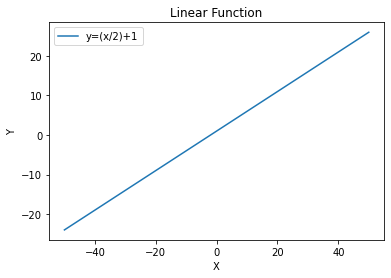

In [5]:
#Linear Function
plt.title("Linear Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x,y,label="y=(x/2)+1")
plt.legend(loc="best")
plt.show()

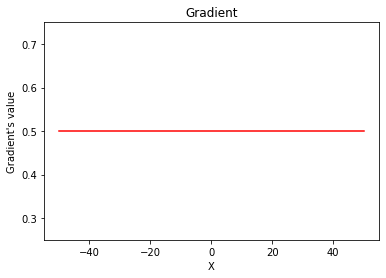

In [6]:
#Gradient
plt.title("Gradient")
plt.xlabel("X")
plt.ylabel("Gradient's value")
xi = list(range(len(x[1:])))
plt.ylim(0.25,0.75)
plt.plot(x[1:], gradient, linestyle='-', color='r', label='Square') 
plt.show()

#### [Problem 5] Python functionalization

In [7]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    x = np.arange(*x_range)
    y = function(x)
    gradient = delta(y)/delta(x)
    return np.column_stack((x,y)), gradient
def function1(array_x):
    #y=x^2
    return array_x**2
def function2(array_x):
    #y=2*x^2+2^x
    return 2*(array_x**2)+2**array_x
def function3(array_x):
    #y=np.sin(array_x**(0.5))
    return np.sin(array_x**(1/2))

func1_array_xy, func1_gradient = compute_gradient(function1)
func2_array_xy, func2_gradient = compute_gradient(function2)
func3_array_xy, func3_gradient = compute_gradient(function3,x_range=(0, 50.1, 0.1))

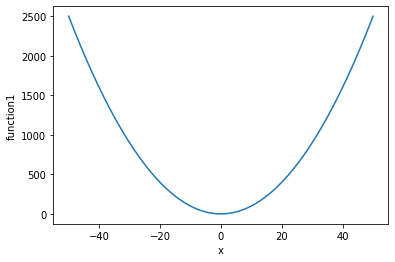

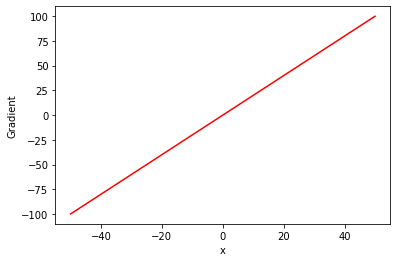

In [8]:
def draw_graph(function, gr_range=(-50, 50.1, 0.1)):
    array_xy, gradient = compute_gradient(function, x_range = gr_range)
    plt.xlabel("x")
    plt.ylabel("{}".format(function.__name__))
    plt.plot(array_xy[:,0],array_xy[:,1],linestyle='-')
    plt.show()
    plt.xlabel("x")
    plt.ylabel("Gradient")
    plt.plot(array_xy[1:,0],gradient,linestyle='-', color='r')
draw_graph(function1)

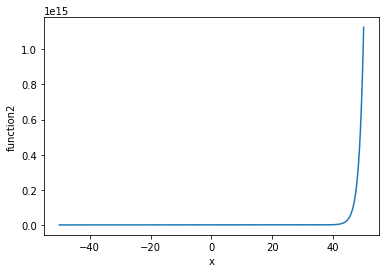

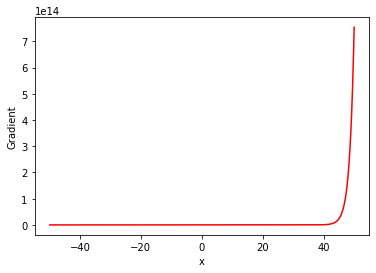

In [9]:
draw_graph(function2)

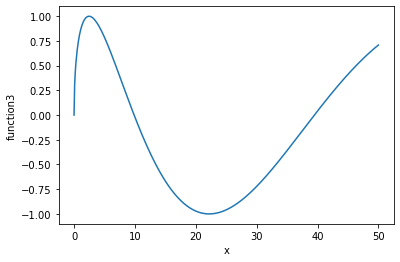

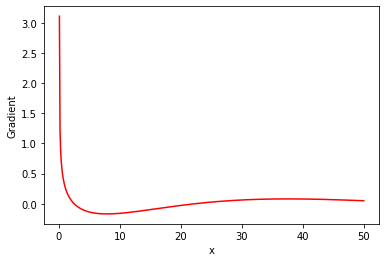

In [10]:
draw_graph(function3,gr_range=(0, 50.1, 0.1))

#### [Problem 6] Find the minimum value

In [18]:
def min_cal(function, x_range = (-50,50.1,0.1)):
    array_x = np.arange(*x_range)
    array_y = function(array_x)
    min_array_y = np.min(array_y)
    arg_min = np.argmin(array_y, axis = 0)
    array_xy = np.column_stack((array_x,array_y))
    print('Min of {} on range {}'.format(function.__name__,x_range))
    print('Min y: {} \nArg_min: X[{}]= {}'.format(min_array_y,arg_min,array_xy[arg_min, 0]))
    slope_before = delta(array_xy[arg_min-1:arg_min+1,1]) / delta(array_xy[arg_min-1:arg_min+1,0])
    slope_after = delta(array_xy[arg_min:arg_min+2,1]) / delta(array_xy[arg_min:arg_min+2,0])
    print('Slope before: {} \nSlope After: {}'.format(slope_before,slope_after))

In [19]:
min_cal(function1)

Min of function1 on range (-50, 50.1, 0.1)
Min y: 5.048709793414476e-25 
Arg_min: X[500]= 7.105427357601002e-13
Slope before: [-0.1] 
Slope After: [0.1]


In [20]:
min_cal(function2)

Min of function2 on range (-50, 50.1, 0.1)
Min y: 0.9505505632959851 
Arg_min: X[498]= -0.1999999999992923
Slope before: [-0.41701833] 
Slope After: [0.02482428]


In [21]:
min_cal(function3, x_range=(0, 50.1, 0.1))

Min of function3 on range (0, 50.1, 0.1)
Min y: -0.9999997540298113 
Arg_min: X[222]= 22.200000000000003
Slope before: [-0.00063884] 
Slope After: [0.00048745]


=========================================================================================================================

This is the end of my assignment. Thank you for reading!